Natalie Cornejo 

Population Pyramid Function
- 

In [2]:
#!pip install wbdata
import wbdata
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objs as go
import plotly.offline as py

# wbdata functions
# get_countries(): Returns code for different countries or regions.
# get_sources(): Gives list of different data sources that can be accessed using the module; returns a numeric key;
# get_indicators(): Given a source, this returns a list of available variables (indicators).
# get_dataframe(): Given a source and a list of indicators, this returns a dataframe populated with the requested data.

Key '-2651332210623475754' not in persistent cache.
Key '5011857274359450680' not in persistent cache.
Key '-3149529902280444492' not in persistent cache.
Key '2931783470239012912' not in persistent cache.
Key '369539612267439777' not in persistent cache.
Key '-595176303847959644' not in persistent cache.
Key '9000457055323159411' not in persistent cache.
Key '-1093373995504928382' not in persistent cache.
Key '5473497281236186855' not in persistent cache.
Key '8152775589836300003' not in persistent cache.
Key '6450104899258479183' not in persistent cache.
Key '4204839878247043868' not in persistent cache.
Key '-3956547298392851304' not in persistent cache.
Key '3064152692829536272' not in persistent cache.
Key '-437477783844967035' not in persistent cache.
Key '-1638088523377631506' not in persistent cache.
Key '-6458668217893647522' not in persistent cache.
Key '1204521267089278912' not in persistent cache.
Key '-2939598703345763253' not in persistent cache.
Key '4723590781637163181'

Function Description
- 

A python function that takes as input a pandas DataFrame with columns providing counts of people by age-sex groups, and constructs a “population pyramid” graph for visualizing the data.

In [3]:
import wbdata
# wbdata.get_sources()
# wbdata.get_indicators(source=40)

In [4]:
age_ranges = []
for i in range(0, 80, 5):
    age_ranges.append(f"{i:02d}{i+4:02d}")
    
age_ranges.append("80UP")
print(age_ranges)

['0004', '0509', '1014', '1519', '2024', '2529', '3034', '3539', '4044', '4549', '5054', '5559', '6064', '6569', '7074', '7579', '80UP']


In [5]:
male_variables = {"SP.POP."+age_range+".MA":"Males "+age_range for age_range in age_ranges}
female_variables = {"SP.POP."+age_range+".FE":"Females "+age_range for age_range in age_ranges}

variables = male_variables
variables.update(female_variables)

In [6]:
def population_pyramid(df, year, country):
    
    y_vals = [int(s[:2]) + 1 if s != "80UP" else 80 for s in age_ranges]
    
    layout = go.Layout(
        title=f"Population Pyramid: {country} ({year[:4]})",
        barmode='overlay',
        yaxis=dict(range=[0, 90], title='Age'),
        xaxis=dict(title='Population')
    )

    bins = [
        go.Bar(
            x=df.loc[year].filter(regex="Males").values,
            y=y_vals,
            orientation='h',
            name='Men'
        ),
        
        go.Bar(
            x=-df.loc[year].filter(regex="Females").values,
            y=y_vals,
            orientation='h',
            name='Women'
        )
    ]
    
    py.iplot(dict(data=bins, layout=layout))

In [7]:
df_japan = wbdata.get_dataframe(
    variables,
    country="JPN",
    parse_dates=True
)
df_japan.head()

,Males 0004,Males 0509,Males 1014,Males 1519,Males 2024,Males 2529,Males 3034,Males 3539,Males 4044,Males 4549,...,Females 3539,Females 4044,Females 4549,Females 5054,Females 5559,Females 6064,Females 6569,Females 7074,Females 7579,Females 80UP
date,,,,,,,,,,,,,,,,,,,,,
2024-01-01,2059274.0,2471573.0,2746527.0,2910807.0,3129418.0,3117708.0,3111527.0,3409915.0,3777593.0,4469385.0,...,3294861.0,3700510.0,4400068.0,4898053.0,4125469.0,3775142.0,3705021.0,4300772.0,4481247.0,8199439.0
2023-01-01,2125049.0,2540621.0,2782890.0,2920226.0,3116101.0,3108024.0,3139634.0,3496345.0,3871177.0,4677849.0,...,3388711.0,3794197.0,4601719.0,4780550.0,4023815.0,3749701.0,3745634.0,4577525.0,4245874.0,8057108.0
2022-01-01,2203263.0,2602406.0,2816136.0,2943889.0,3111485.0,3086833.0,3181250.0,3561620.0,3985411.0,4860987.0,...,3464077.0,3907567.0,4777150.0,4658682.0,3904704.0,3730321.0,3857019.0,4858791.0,4028843.0,7867011.0
2021-01-01,2284807.0,2652846.0,2842543.0,2977681.0,3102285.0,3081584.0,3234110.0,3622394.0,4125529.0,4988586.0,...,3534195.0,4046671.0,4895965.0,4451325.0,3878450.0,3718897.0,4017343.0,5053900.0,3839128.0,7660586.0
2020-01-01,2374426.0,2695687.0,2860021.0,3027040.0,3092260.0,3087256.0,3308844.0,3694981.0,4290920.0,5052083.0,...,3611005.0,4212676.0,4951087.0,4249470.0,3879434.0,3742758.0,4203855.0,4992289.0,3856045.0,7409794.0


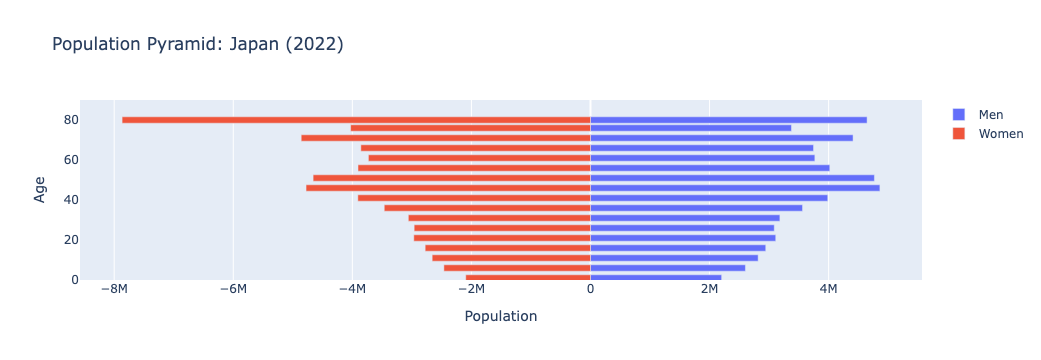

In [8]:
population_pyramid(
    df=df_japan,
    year="2022-01-01",
    country="Japan"
)

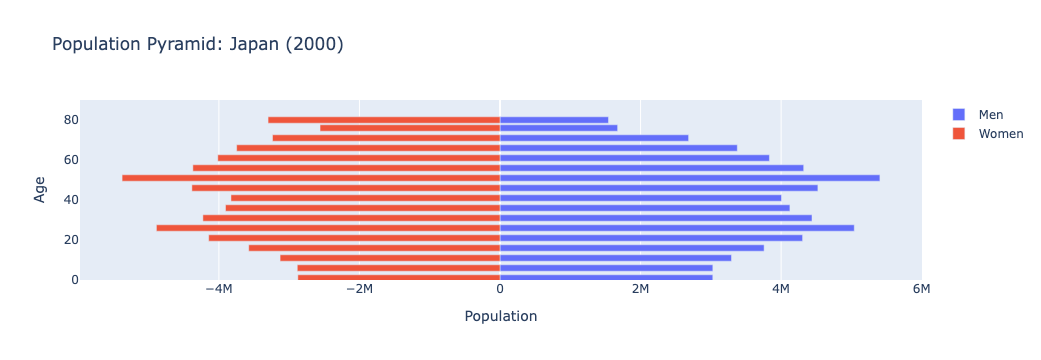

In [10]:
population_pyramid(
    df=df_japan,
    year="2000-01-01",
    country="Japan"
)

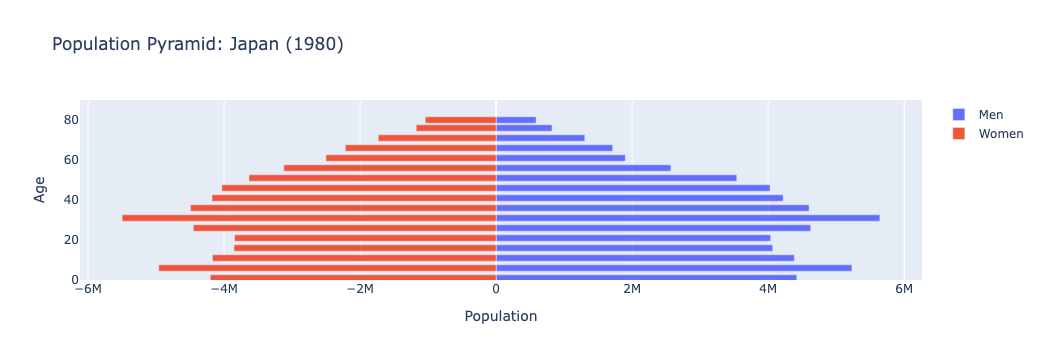

In [11]:
population_pyramid(
    df=df_japan,
    year="1980-01-01",
    country="Japan"
)

In [12]:
df_niger = wbdata.get_dataframe(
    variables,
    country="NER",
    parse_dates=True
)
df_niger.head()

,Males 0004,Males 0509,Males 1014,Males 1519,Males 2024,Males 2529,Males 3034,Males 3539,Males 4044,Males 4549,...,Females 3539,Females 4044,Females 4549,Females 5054,Females 5559,Females 6064,Females 6569,Females 7074,Females 7579,Females 80UP
date,,,,,,,,,,,,,,,,,,,,,
2024-01-01,2428334.0,2117101.0,1856871.0,1560940.0,1263698.0,996365.0,777899.0,628459.0,524587.0,423177.0,...,600097.0,497973.0,403248.0,327501.0,268947.0,215640.0,160444.0,107972.0,66105.0,39555.0
2023-01-01,2369724.0,2073417.0,1801458.0,1503383.0,1211505.0,949326.0,744708.0,607877.0,507282.0,406649.0,...,579755.0,480885.0,388046.0,317145.0,261196.0,208330.0,154405.0,103137.0,65512.0,37213.0
2022-01-01,2317851.0,2025862.0,1745222.0,1445888.0,1159372.0,904849.0,714565.0,588741.0,489672.0,391353.0,...,560706.0,463701.0,374161.0,307563.0,253707.0,201149.0,148671.0,99462.0,64215.0,35105.0
2021-01-01,2275199.0,1974871.0,1688378.0,1389268.0,1108586.0,863461.0,687335.0,570922.0,471986.0,377532.0,...,542802.0,446658.0,361668.0,298810.0,246548.0,194357.0,143403.0,97415.0,61984.0,33424.0
2020-01-01,2236554.0,1922132.0,1630562.0,1333696.0,1059220.0,825164.0,662524.0,553913.0,454390.0,364683.0,...,525668.0,429961.0,350017.0,290466.0,239463.0,187784.0,138289.0,96112.0,59324.0,31792.0


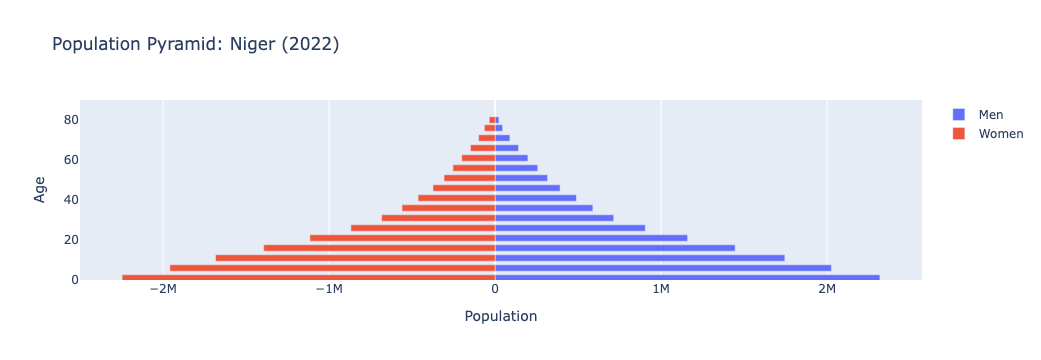

In [13]:
population_pyramid(
    df=df_niger,
    year="2022-01-01",
    country="Niger"
)

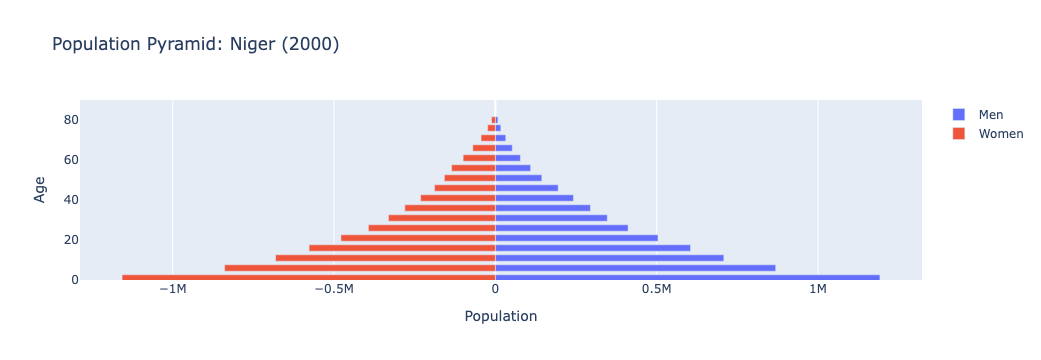

In [14]:
population_pyramid(
    df=df_niger,
    year="2000-01-01",
    country="Niger"
)

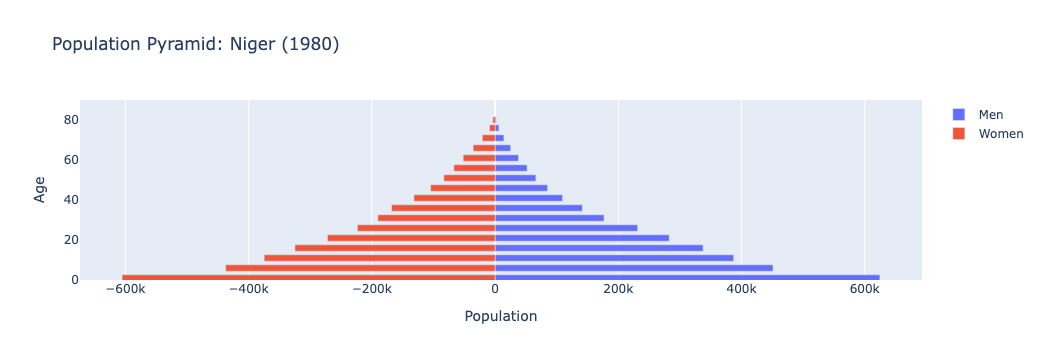

In [15]:
population_pyramid(
    df=df_niger,
    year="1980-01-01",
    country="Niger"
)